# 1. Load the dataset, clean the data

In [173]:
import pandas as pd

path = 'C:/Users/pinhash/Documents/python_test/android_bids_us.csv'

print(path)

C:/Users/pinhash/Documents/python_test/android_bids_us.csv


In [174]:
# counting the number of rows in the target file
text_file_reader = pd.read_csv(path,sep=',', nrows=10000)

df1 = pd.DataFrame(text_file_reader)
df1.shape

(10000, 12)

In [175]:
df1.head()
# we can see some feature contribue little data and we will discard them later (device maker,model)

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,NaN,NaN,7.0,720,1280,chartboost,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,NaN,NaN,7.0,1280,720,chartboost,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,NaN,NaN,7.1.1,720,1280,chartboost,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,NaN,NaN,6.0.1,720,1280,chartboost,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,NaN,NaN,7.1.1,1024,768,chartboost,0


# 2. Explore the data (EDA)

In [176]:
import matplotlib.pyplot as plt

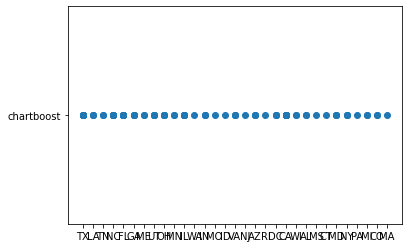

In [177]:
x_data = df1['user_state']
# y_data = df1['device_height']
y_data = df1['marketplace']
plt.scatter(x_data[1:100],y_data[1:100])
# We can see that from the 1000 examoles we chose, chartboost is the only market place.

# 3. Rank existing features importance

In [178]:
# Remove the non-contributing columns

# remove columns with Nan
df1.dropna(axis = 'columns', inplace = True)

# # remove marketplace, device_height, device_width
df1.drop(columns = ['marketplace', 'device_height', 'device_width'], inplace = True)
df1.head()

,bidid,utc_time,app_id,user_state,user_isp,device_osv,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,7.0,0
1,9284441f-a6ea-4698-9017-86436b92d416,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,7.0,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,7.1.1,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,6.0.1,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,7.1.1,0


# 4. Engineer new features (e.g. day-of-week)

### 4.1 date time

In [179]:
from datetime import datetime # import libraries

In [180]:
# Create a date drom the utc_time
new_time = df1['utc_time']
new_time_F = new_time/1000 # for the function: datetime.utcfromtimestamp

# create new column for the date and the day of the week this date falls on
df_temp = pd.DataFrame(columns = ['date_time','week_day'])

# going over each time stamp to convert to a date time stamp 2019-8-9 ... (can it be vectorized?)
for i in range(len(new_time_F)):
    dt = datetime.utcfromtimestamp(new_time_F[i])
    df_temp = df_temp.append({'date_time':dt,'week_day':dt.isoweekday()}, ignore_index=True)
    # Iso weekday - 1 is monday 7 is sunday
    
# adding new columns
df1.insert(loc = 1, column = 'date_time', value = df_temp['date_time'])
df1.insert(loc = 1, column = 'week_day', value = df_temp['week_day'])

In [181]:
# presenting the improved data frame
df1.head()

,bidid,week_day,date_time,utc_time,app_id,user_state,user_isp,device_osv,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,6,2018-09-08 22:05:31.894,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,7.0,0
1,9284441f-a6ea-4698-9017-86436b92d416,6,2018-09-08 22:06:03.932,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,7.0,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,6,2018-09-08 22:06:26.908,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,7.1.1,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,6,2018-09-08 22:06:45.023,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,6.0.1,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,6,2018-09-08 22:07:23.458,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,7.1.1,0


### 4.2 Adding year, month and day columns

In [182]:
# turning the date time to years/months/weeks/days format
if 'year' in df1: del df1['year']
if 'month' in df1: del df1['month']
if 'day' in df1: del df1['day']
df1.insert(loc = 1, column ='year', value = df1['date_time'].dt.year)
df1.insert(loc = 1, column ='month', value = df1['date_time'].dt.month)
df1.insert(loc = 1, column ='day', value = df1['date_time'].dt.day)

df1.head()

,bidid,day,month,year,week_day,date_time,utc_time,app_id,user_state,user_isp,device_osv,click
0,87b0108c-6e9f-4783-8b80-8dd5aa3529a8,8,9,2018,6,2018-09-08 22:05:31.894,1536444331894,com.OppanaGames.CarSim,TX,AT&T Wireless,7.0,0
1,9284441f-a6ea-4698-9017-86436b92d416,8,9,2018,6,2018-09-08 22:06:03.932,1536444363932,com.mobilityware.CrownSolitaire,TX,T-Mobile USA,7.0,0
2,7e4779c2-f757-4324-8c2a-138b558b5a54,8,9,2018,6,2018-09-08 22:06:26.908,1536444386908,com.kuttigames.tenkyurollball,LA,AT&T Wireless,7.1.1,0
3,b64ea208-38ca-42ac-895e-0842d7352cc3,8,9,2018,6,2018-09-08 22:06:45.023,1536444405023,com.trendactionfree.call_of_sniper_duty_frontl...,TN,Comcast Cable,6.0.1,0
4,fd0c07cb-31f6-408c-9315-1cb652e76abc,8,9,2018,6,2018-09-08 22:07:23.458,1536444443458,com.landslab.my3rdgrademathgames,NC,AT&T U-verse,7.1.1,0


# 5. Optional: Enrich the dataset with external sources (e.g. timezones, app categories)

### 5.1 timezone

In [183]:
import pytz
# adding time zone
east_tz = pytz.timezone('US/eastern')
dt_east = df1['date_time'][0]
dt_east = east_tz.localize(dt_east)
dt_east
# for tz in pytz.all_timezones:
#     print(tz)

# import us  - I didn't find this module to convert state into timezone


Timestamp('2018-09-08 22:05:31.894000-0400', tz='US/Eastern')

# Training

In [195]:
# adding a timezone
from sklearn.model_selection import train_test_split
X = df1['week_day']
y = df1['click'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [198]:
print('X train shape is: ', X_train.shape)
print('X test shape is: ', X_test.shape)
print('y train shape is: ', y_train.shape)
print('y test shape is: ', y_test.shape)

X train shape is:  (8000,)
X test shape is:  (2000,)
y train shape is:  (8000,)
y test shape is:  (2000,)


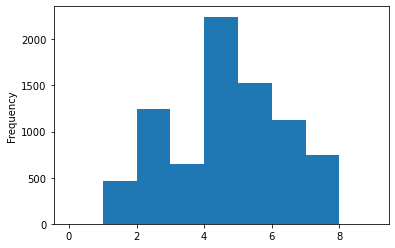

In [214]:
bins1 = [0, 1, 2, 3, 4, 5, 6,7,8,9]
# n, bins, patches = plt.hist(X_train,y_train)
pd.Series(X_train).plot(kind='hist', bins=bins1)
# Iso weekday - 1 is monday 7 is sunday - the highest click data (clicked and not) is from 4, that is, Thursday

# The End